In [1]:
import warnings
warnings.simplefilter('ignore')

from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

from minepy import MINE

from pyHSICLasso import HSICLasso

In [2]:
import minepy
print(minepy.__version__)

b'1.2.6'


Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Gaussian kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Gaussian kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Gaussian kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Gaussian kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Gaussian kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Gaussian kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Gaussian kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Gaussian kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Gaussian kernel for the outcomes.
B

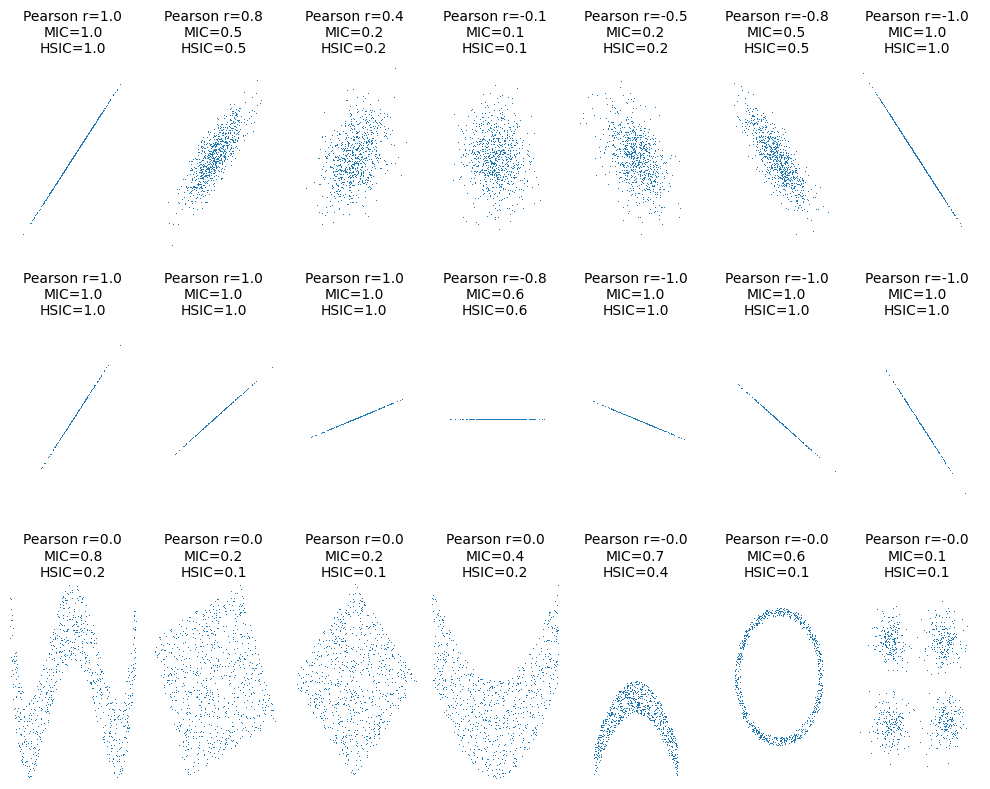

In [3]:
rs = np.random.RandomState(seed=0)

def mysubplot(x, y, numRows, numCols, plotNum,
              xlim=(-4, 4), ylim=(-4, 4)):

    # ピアソンの相関係数
    r = np.around(np.corrcoef(x, y)[0, 1], 1)
    # MIC
    mine = MINE(alpha=0.6, c=15, est="mic_approx")
    mine.compute_score(x, y)
    mic = np.around(mine.mic(), 1)
    # HSIC
    hsic_lasso = HSICLasso()
    # 多次元配列で入力しないといけない
    n = x.shape[0]
    x = x.reshape(n,1)
    x2 = np.concatenate([x,x],axis=1)
    #y = y.reshape(n,1)
    hsic_lasso.input(x2,y) 
    hsic_lasso.regression(max_neighbors=0)
    hsic = hsic_lasso.Xty[0]
    ax = plt.subplot(numRows, numCols, plotNum,
                     xlim=xlim, ylim=ylim)
    ax.set_title('Pearson r=%.1f\nMIC=%.1f\nHSIC=%.1f' % (r, mic, hsic),fontsize=10)
    ax.set_frame_on(False)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.plot(x, y, ',')
    ax.set_xticks([])
    ax.set_yticks([])
    return ax

def rotation(xy, t):
    return np.dot(xy, [[np.cos(t), -np.sin(t)], [np.sin(t), np.cos(t)]])

def mvnormal(n=1000):
    cors = [1.0, 0.8, 0.4, 0.0, -0.4, -0.8, -1.0]
    for i, cor in enumerate(cors):
        cov = [[1, cor],[cor, 1]]
        xy = rs.multivariate_normal([0, 0], cov, n)
        mysubplot(xy[:, 0], xy[:, 1], 3, 7, i+1)

def rotnormal(n=1000):
    ts = [0, np.pi/12, np.pi/6, np.pi/4, np.pi/2-np.pi/6,
          np.pi/2-np.pi/12, np.pi/2]
    cov = [[1, 1],[1, 1]]
    xy = rs.multivariate_normal([0, 0], cov, n)
    for i, t in enumerate(ts):
        xy_r = rotation(xy, t)
        mysubplot(xy_r[:, 0], xy_r[:, 1], 3, 7, i+8)

def others(n=1000):
    x = rs.uniform(-1, 1, n)
    y = 4*(x**2-0.5)**2 + rs.uniform(-1, 1, n)/3
    mysubplot(x, y, 3, 7, 15, (-1, 1), (-1/3, 1+1/3))

    y = rs.uniform(-1, 1, n)
    xy = np.concatenate((x.reshape(-1, 1), y.reshape(-1, 1)), axis=1)
    xy = rotation(xy, -np.pi/8)
    lim = np.sqrt(2+np.sqrt(2)) / np.sqrt(2)
    mysubplot(xy[:, 0], xy[:, 1], 3, 7, 16, (-lim, lim), (-lim, lim))

    xy = rotation(xy, -np.pi/8)
    lim = np.sqrt(2)
    mysubplot(xy[:, 0], xy[:, 1], 3, 7, 17, (-lim, lim), (-lim, lim))

    y = 2*x**2 + rs.uniform(-1, 1, n)
    mysubplot(x, y, 3, 7, 18, (-1, 1), (-1, 3))

    y = (x**2 + rs.uniform(0, 0.5, n)) * \
        np.array([-1, 1])[rs.randint(0, 1, size=n)]
    mysubplot(x, y, 3, 7, 19, (-1.5, 1.5), (-1.5, 1.5))

    y = np.cos(x * np.pi) + rs.uniform(0, 1/8, n)
    x = np.sin(x * np.pi) + rs.uniform(0, 1/8, n)
    mysubplot(x, y, 3, 7, 20, (-1.5, 1.5), (-1.5, 1.5))

    xy1 = np.random.multivariate_normal([3, 3], [[1, 0], [0, 1]], int(n/4))
    xy2 = np.random.multivariate_normal([-3, 3], [[1, 0], [0, 1]], int(n/4))
    xy3 = np.random.multivariate_normal([-3, -3], [[1, 0], [0, 1]], int(n/4))
    xy4 = np.random.multivariate_normal([3, -3], [[1, 0], [0, 1]], int(n/4))
    xy = np.concatenate((xy1, xy2, xy3, xy4), axis=0)
    mysubplot(xy[:, 0], xy[:, 1], 3, 7, 21, (-7, 7), (-7, 7))

plt.figure(figsize=(10,8),facecolor='white')
mvnormal(n=800)
rotnormal(n=200)
others(n=800)
plt.tight_layout()
plt.show()

In [4]:
# The relation of binary objective
# three of five features are redundancy ones
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=5000,n_features=5,n_informative=2,n_redundant=3,n_classes=2,random_state=42)

<Axes: >

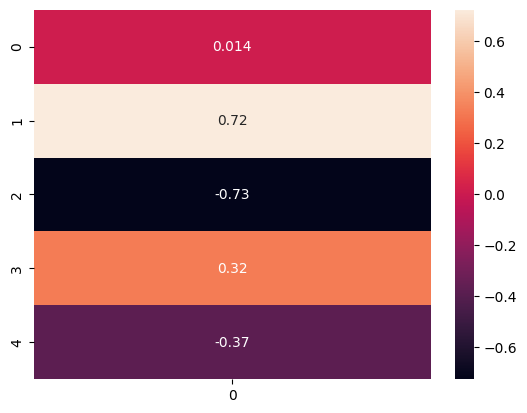

In [5]:
# pearson correlation coefficients
import seaborn as sns
sns.heatmap(np.corrcoef(X,y,rowvar=False)[:-1,-1].reshape(-1,1),annot=True)

In [8]:
from minepy import cstats
mic_c, tic_c = cstats(X.T,y.reshape(1,-1))  # variables, samples (2d-array)

<Axes: >

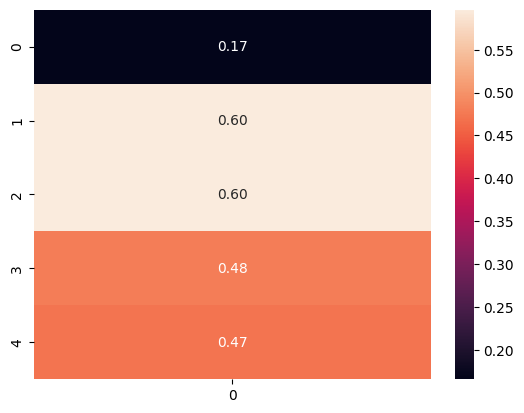

In [9]:
## mic
sns.heatmap(mic_c, annot=True, fmt=".2f")

In [10]:
hsic_lasso = HSICLasso()
hsic_lasso.input(X,y)
hsic_lasso.classification(5,max_neighbors=0)

Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


True

<Axes: >

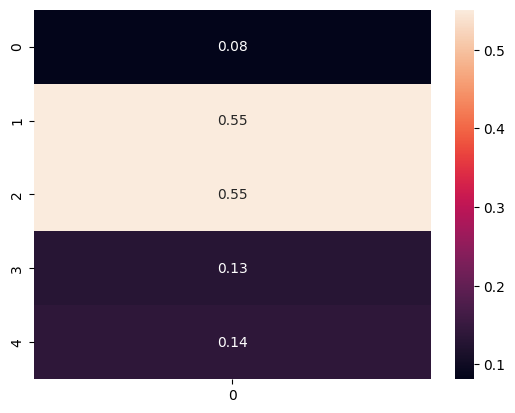

In [11]:
#HSICの場合
sns.heatmap(hsic_lasso.Xty, annot=True, fmt=".2f")